#  Revenue prediction from Ecommerce customers' membership data
## Machine Learning - Regression Analysis By Nakul Havaldar

## Motivation behind the problem

In [3]:

import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import normaltest
sns.set()

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Ecommerce Customers.csv to Ecommerce Customers.csv


# **Descriptive Analysis of the Dataset**




*   How much data is present ?

  There are 500 data points with 8 attributes

-  What attributes/features are continuous
valued ?

  Continued values are **session length, time on app, time on website, length of membership , yearly amount spent**

- Which attributes are categorical ?

  Attrributes like **email, adddress** and **avater** are catagorical



In [6]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Ecommerce Customers.csv']))
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Checking for Null/Nan values

- We check and perfrom if there are any NaN values in the dataset as it would not be benefical for the ML model.
- We will have to handel them depending on the count.
- Here there are none so we are good to go.
-If there were some NaN values we could replace it with feature median or drop those instances depending upon the data sensitivity.

In [6]:
has_nan = df.isna().any().any()

if has_nan:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain NaN values.")

DataFrame does not contain NaN values.


In [7]:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Email', 'Address', 'Avatar'], dtype='object')


In [8]:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [9]:

df.shape

(500, 8)

## Statistical Description of the Dataset

In [10]:
df.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


## Dealing with the catagorical values

As mentioned earlier the catagorical values in our data set are Email of the customer, The address of the customer and the avatar they have on the app or website. see unique for avatar

In [15]:
unique_values = df['Avatar'].unique()

print(unique_values)

['Violet' 'DarkGreen' 'Bisque' 'SaddleBrown' 'MediumAquaMarine'
 'FloralWhite' 'DarkSlateBlue' 'Aqua' 'Salmon' 'Brown' 'Tomato'
 'RoyalBlue' 'DarkBlue' 'Peru' 'PowderBlue' 'OliveDrab' 'Cyan'
 'LightSeaGreen' 'PeachPuff' 'Black' 'Olive' 'Silver' 'Wheat' 'Teal'
 'Linen' 'MediumSlateBlue' 'LemonChiffon' 'DarkOrchid' 'SeaGreen'
 'SteelBlue' 'DarkMagenta' 'DarkGoldenRod' 'DarkSeaGreen' 'Gainsboro'
 'HotPink' 'HoneyDew' 'WhiteSmoke' 'GhostWhite' 'Chocolate' 'Snow'
 'BurlyWood' 'Moccasin' 'BlueViolet' 'MediumBlue' 'GreenYellow'
 'SandyBrown' 'MediumVioletRed' 'DarkOliveGreen' 'DarkSalmon' 'DeepPink'
 'SkyBlue' 'Magenta' 'DarkTurquoise' 'SpringGreen' 'OrangeRed' 'LimeGreen'
 'LightGreen' 'LightYellow' 'MintCream' 'DimGray' 'Indigo' 'LightSalmon'
 'DeepSkyBlue' 'Turquoise' 'LightSteelBlue' 'Cornsilk' 'DarkKhaki'
 'FireBrick' 'SlateGray' 'Crimson' 'MidnightBlue' 'DarkCyan' 'OldLace'
 'Gray' 'LightPink' 'BlanchedAlmond' 'CadetBlue' 'PaleTurquoise'
 'Chartreuse' 'Khaki' 'MediumSpringGreen' 'Lime' 

In [12]:
dummies = pd.get_dummies(df.Avatar)

In [13]:
merged_df = pd.concat([df, dummies], axis = 1)

In [7]:
#dropping email, address and avatar : catagorical values
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
#statistics for each column
describe = (merged_df.describe().T)
describe

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462
...,...,...,...,...,...,...,...,...
Wheat,500.0,0.012000,0.108994,0.000000,0.000000,0.000000,0.000000,1.000000
White,500.0,0.010000,0.099598,0.000000,0.000000,0.000000,0.000000,1.000000
WhiteSmoke,500.0,0.008000,0.089173,0.000000,0.000000,0.000000,0.000000,1.000000
Yellow,500.0,0.002000,0.044721,0.000000,0.000000,0.000000,0.000000,1.000000


# Exploratory Data Analysis
Display  the  statistical  values  for  each  of  the  attributes,  along  with  visualizations  (e.g.,
histogram)  
below is the statistical analysis of all of the attributes. Its histogram is ploted to uderstand the it distribution and check if the data is skewed or not.


 Explain  noticeable  traits  for  key
attributes.
All the  attributes are fairly following normal distributione expect for averge sessoin length.

Are  there  any  attributes  that  might  require  special  treatment?  If  so,  what
special treatment might they require?
Some attributes like email, address and avatar are dropped as they do not provide any special numerical value.  Here below you an see all of them are also scaled into standaedscaler form for the betterment of learning of the model.

## Understanding the data types of the important features

In [16]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploring the distribution of the features with Histograms & P - values



0.161

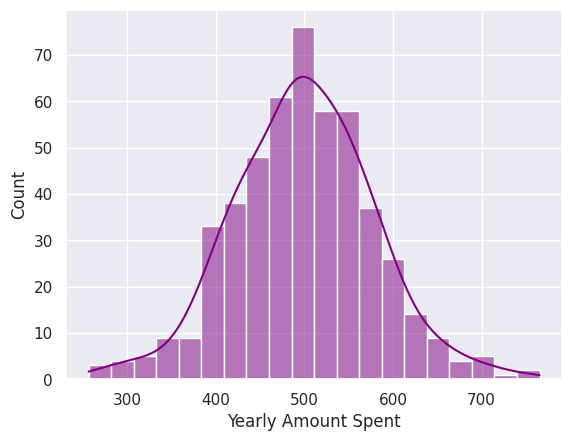

In [8]:
sns.histplot(df['Yearly Amount Spent'], kde= True, color = 'purple');
normaltest(df['Yearly Amount Spent']).pvalue.round(3)

We can see above the distribution of our target variable. It is seen that majority of this data lies in between 400 dollars to 600 dollars. We will verify that with the box plot later but it farily assumess a normal distribution and the data does not seem to be skewed. The median for the dataset looks to fall around 500.

p-value for normality (column 'Avg. Session Length'): 0.945


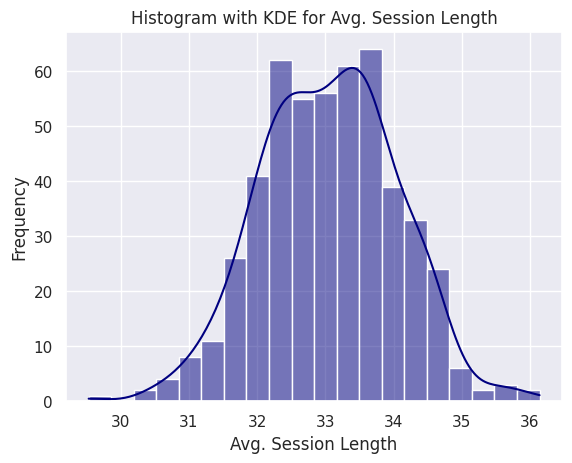

p-value for normality (column 'Time on App'): 0.577


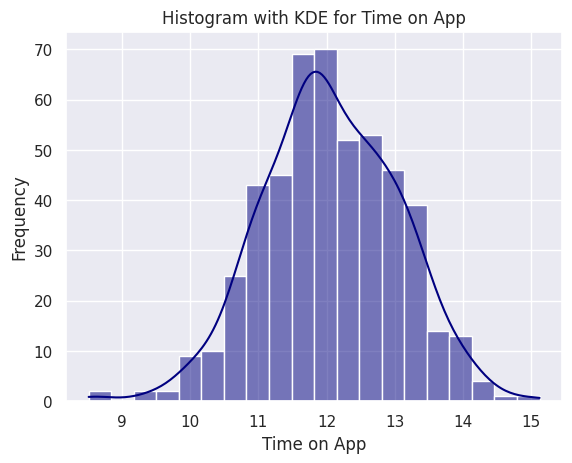

p-value for normality (column 'Time on Website'): 0.925


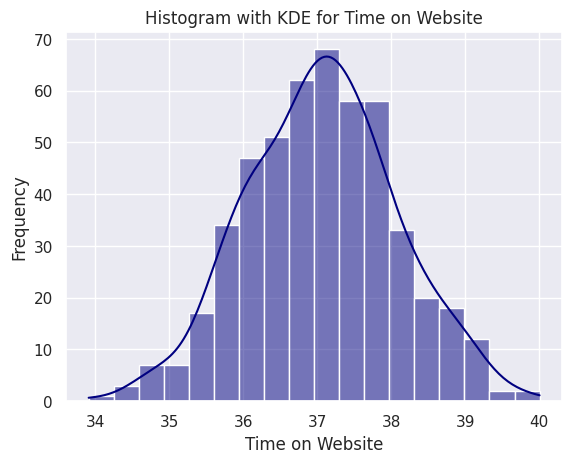

p-value for normality (column 'Length of Membership'): 0.2


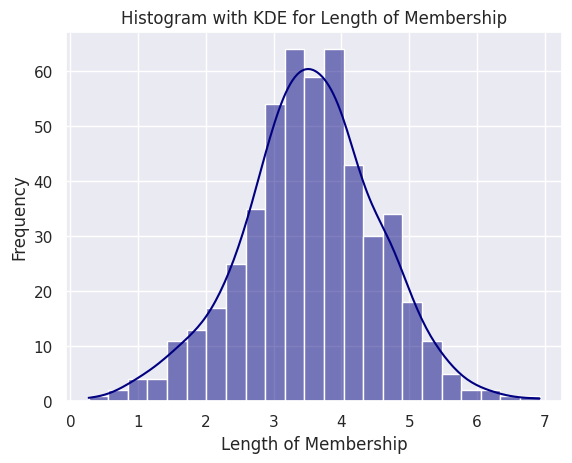

p-value for normality (column 'Yearly Amount Spent'): 0.161


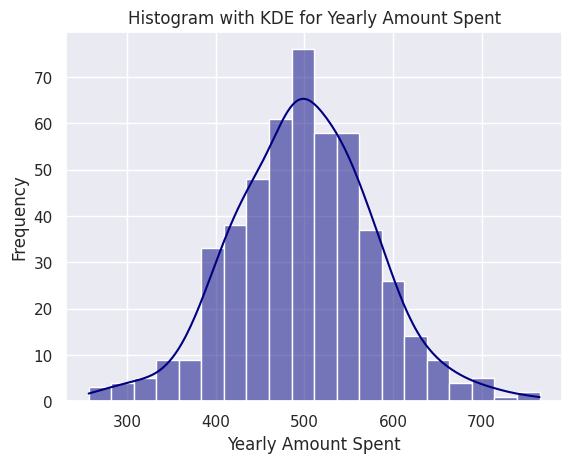

In [27]:
# Iterate through each column
for column in df.columns:
    # Plot histogram with KDE
    sns.histplot(df[column], kde=True, color='navy')

    # Calculate p-value for normality
    p_value = normaltest(df[column]).pvalue.round(3)
    print(f"p-value for normality (column '{column}'): {p_value}")

    # Display the plot
    plt.title(f'Histogram with KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [31]:
# Calculating the interquartile range for each numeric column
describe = df.describe(percentiles=[.25, .75])
IQR = describe.loc['75%'] - describe.loc['25%']
IQR

Avg. Session Length       1.370163
Time on App               1.365696
Time on Website           1.367175
Length of Membership      1.196052
Yearly Amount Spent     104.275551
dtype: float64

## BOX plot analysis

For the box plots we can see that Session length, Time on App and Time of website shows similar distribution. Length of membership and yearly amount spent shows similarity in their data distribution.
That could also be verifivied with the histograms above. We will verify it later with correlation analysis as well.
Box plots help us understand the nature of our data for outlier analysis. Handeling these outlier before proceding for machine learnig modeling is a good practice.

When interpreting box plots, there are three key aspects to consider:

The median, denoted by the line at the center of the box, signifies the value that sits midway between the smallest and largest data points.

The interquartile range, represented by the length of the box, illustrates the difference between the first quartile (the 25th percentile) and the third quartile (the 75th percentile).

The whiskers, extending from either side of the box, encapsulate the data points falling within one standard deviation of the median.

Data points lying beyond this range are identified as outliers.

Analysis for the target variable


*   The median appears to be 500 dollars for payments on subsription.
*   Data between IOR1 and IQR 2 = 50% of data is from dollar 450 to dollar 550.
- There are not many outliers in the target variable but we will handle them for effective training of the model as outliers would hamper in effecient model performance.
- The whiskers are also not that long so there is no much variability in the dataset. That is good for our ML application.



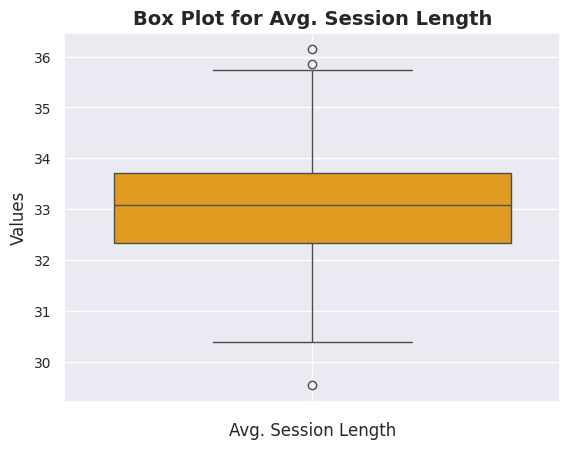

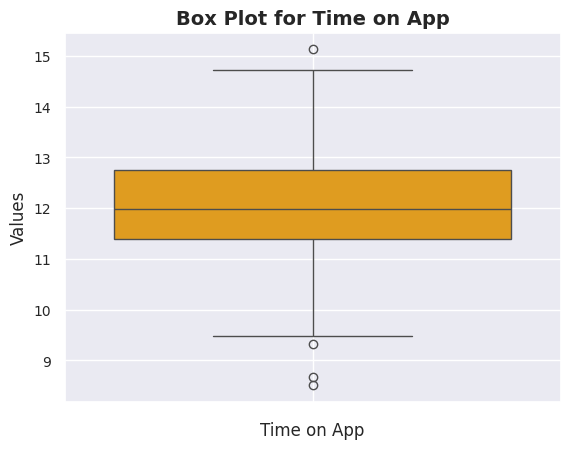

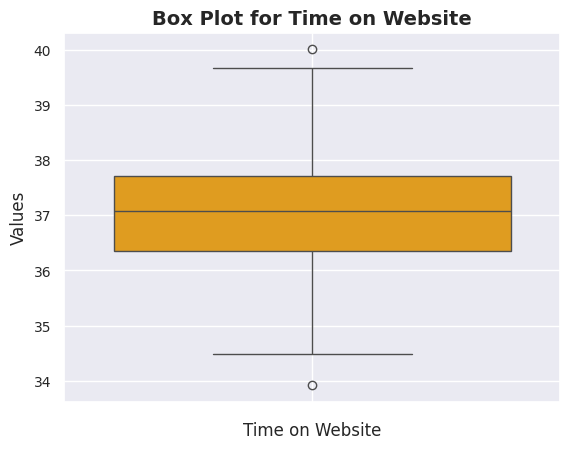

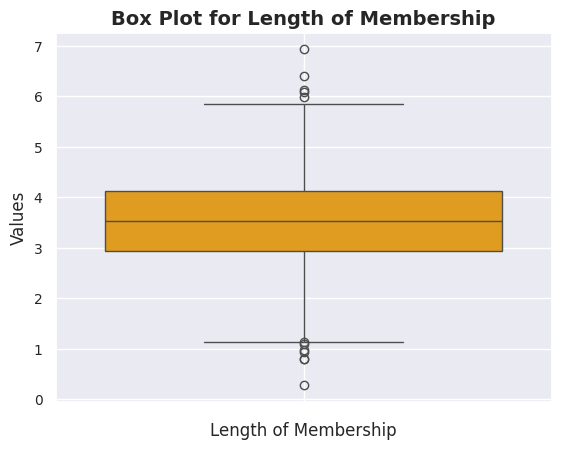

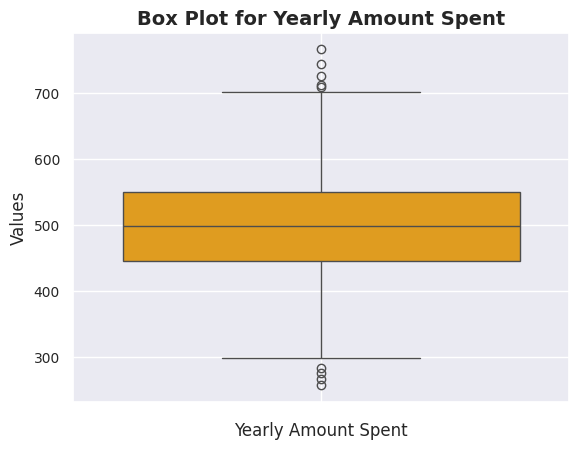

In [16]:
# Filter numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through numerical columns and create box plots with seaborn
for column in numerical_columns:
    plt.figure()
    sns.boxplot(data=df[column], color='orange')  # Adjust color as needed
    plt.title(f'Box Plot for {column}', fontsize=14, fontweight='bold')  # Add title with larger font
    plt.xlabel(column, fontsize=12)  # Add xlabel with larger font
    plt.ylabel('Values', fontsize=12)  # Add ylabel with larger font
    plt.xticks(fontsize=10)  # Adjust xticks font size
    plt.yticks(fontsize=10)  # Adjust yticks font size
    plt.grid(True)  # Add grid for better visualization
    plt.show()


## Detection of outliers in the data and Handleing them

In [17]:
import numpy as np

# Define the function for outlier detection using IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers

# Iterate through each column in the DataFrame and detect outliers
outliers_dict = {}
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        outliers = detect_outliers_iqr(df[column])
        outliers_dict[column] = outliers

# Print or use outliers_dict as needed
print(outliers_dict)


{'Avg. Session Length': [29.532428967057943, 35.86023651335309, 36.13966248879052], 'Time on App': [8.508152176032603, 8.668349517101323, 9.316289204373824, 15.126994288792469], 'Time on Website': [33.91384724758464, 40.005181638101895], 'Length of Membership': [0.2699010899842742, 0.7895199078816915, 0.8015157200042076, 0.9364975973183264, 0.9686221157417688, 1.0845853030221226, 1.1304769604319769, 5.97676812602, 6.076653638440144, 6.115198945760052, 6.401228837806773, 6.922689335035807], 'Yearly Amount Spent': [256.67058229005585, 266.086340948469, 275.9184206503857, 282.4712457199145, 708.9351848669819, 712.3963268096636, 725.5848140556805, 744.2218671047146, 765.5184619388372]}


# Answer to question 3

The correlation of each of the attribute with anothe attribute is displayed below.

specially the attribute "length of memebership" and the label Yearly amount spent has a positive correlation. That is the attributes are dependent.

The realtion between other attributes and the label yealry amount spent or with other attributes is ambigous. We cannot comment upon their dependancies.

Below I have calculated the pearson correlation for each of the attributes.

Below the same dependencies are visualized in a differnet way where yearly amount spent for different variables could be easily seen and segmented.

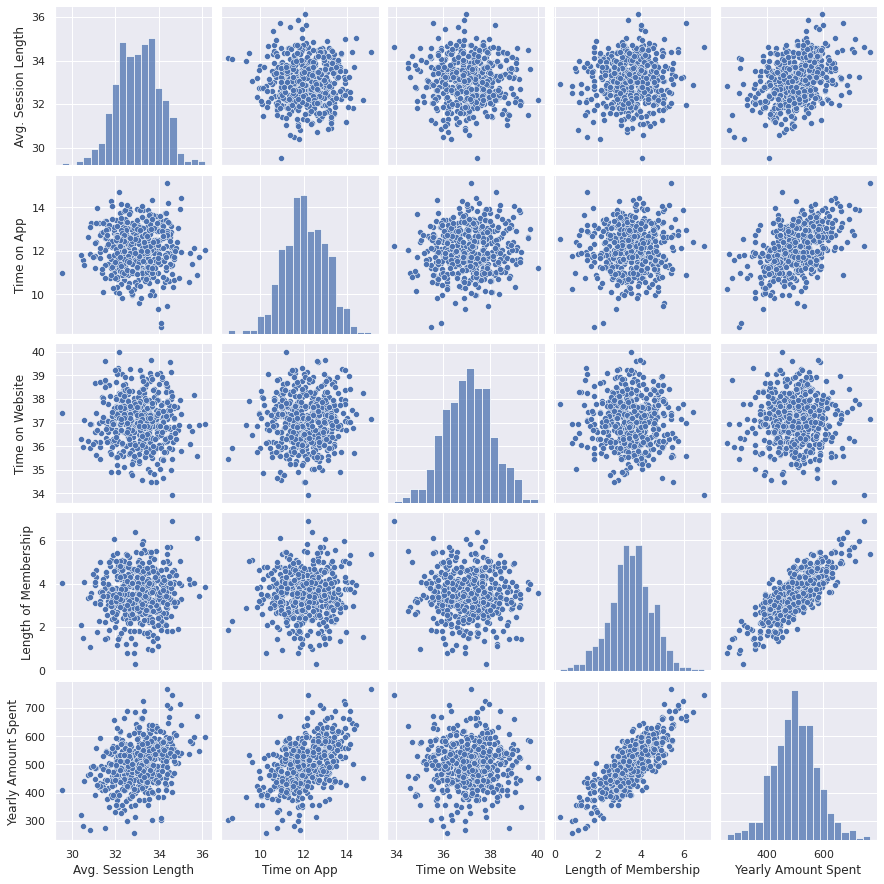

In [ ]:
# visulaizing the realtionship of attributed with one another:
sns.pairplot(df)

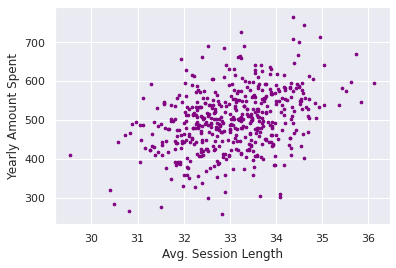

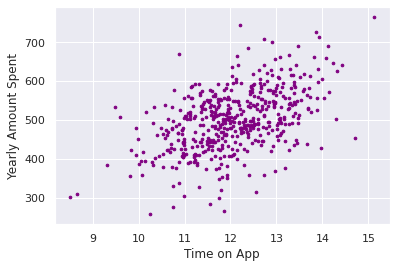

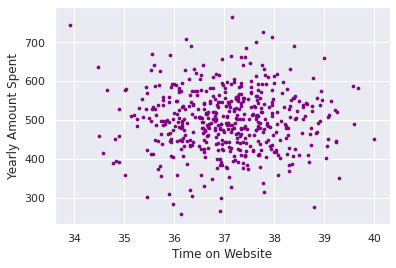

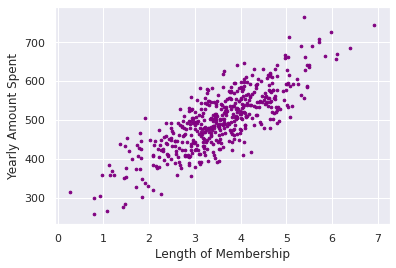

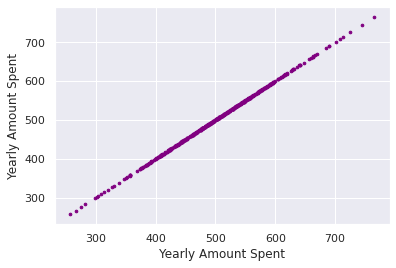

In [ ]:
variables = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent']
for variable in variables:
    df.plot.scatter(x=variable, y='Yearly Amount Spent', s=7, color = "purple")

In [ ]:
#calculating the pearson coefficient:
corr = df.corr(method='pearson')
corr

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [ ]:
#coefficients using heatmaps
corr.style.background_gradient(cmap="inferno").set_precision(2)

<ipython-input-15-9d514f8cfb91>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="inferno").set_precision(2)


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.00,-0.03,-0.03,0.06,0.36
Time on App,-0.03,1.00,0.08,0.03,0.50
Time on Website,-0.03,0.08,1.00,-0.05,-0.00
Length of Membership,0.06,0.03,-0.05,1.00,0.81
Yearly Amount Spent,0.36,0.50,-0.00,0.81,1.00


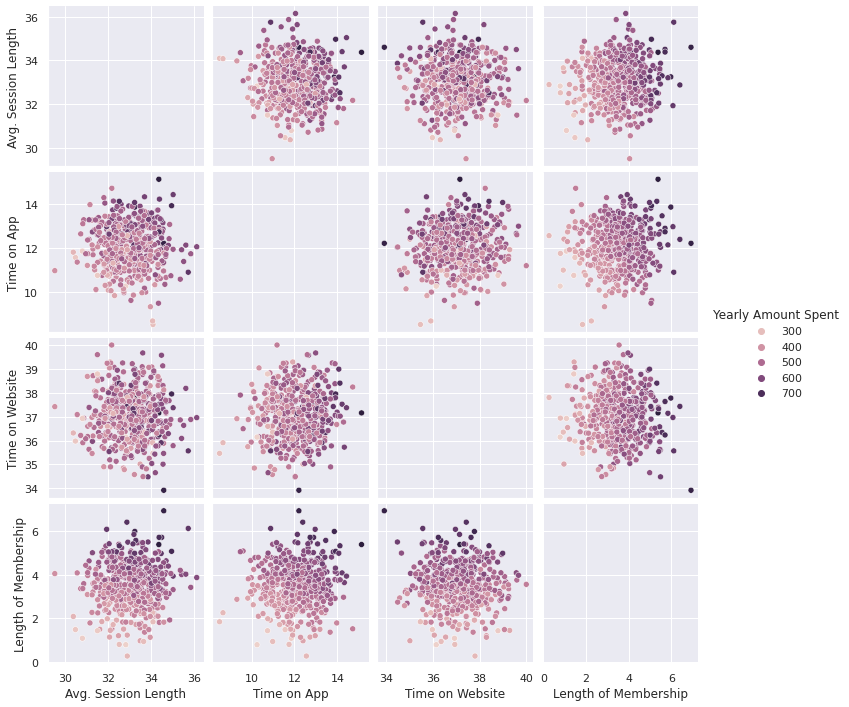

In [ ]:
sns.pairplot(df, hue = 'Yearly Amount Spent', dropna = "TRUE")

# Checking the null values and realizing there are no null values here

In [ ]:
#checking for null values :
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
df1 = df.copy()
#stratification:
train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [ ]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,100.0,33.020976,1.016098,30.393185,32.399784,32.999619,33.667682,36.139662
Time on App,100.0,12.031574,0.978948,9.316289,11.361947,11.932389,12.641367,14.715388
Time on Website,100.0,37.219081,0.970098,35.189122,36.590659,37.166684,37.791517,40.005182
Length of Membership,100.0,3.395050,0.866448,0.801516,2.871707,3.397749,4.037917,5.137817
Yearly Amount Spent,100.0,488.601586,70.723040,275.918421,444.796391,488.170760,534.913294,666.125592


# Splitting the data into test set 20 % and verifying the set is sample representative of the population original dataset

# Answer to question 4

This is done using stratified sampling method.
Reference for code and concept is the text book here

Here a dummy column hasd been made to check the distribution of the data to be same in original column from original dataset and the stratified test dataset.

Then a table will also tell the error between if we would have used train test split and strtified sampling against the original column.

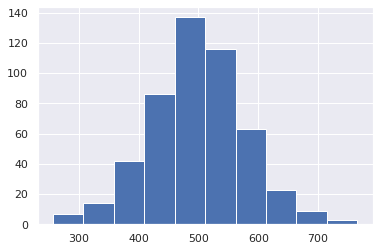

In [ ]:
df1["Yearly Amount Spent"].hist()

In [ ]:
df1["Amount_spent"] = pd.cut(df1["Yearly Amount Spent"],
                               bins=[0, 300, 400, 500, 600, 800],
                               labels=[1, 2, 3, 4,5])

In [ ]:
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split1.split(df1, df1["Amount_spent"]):
    strat_train_set = df1.loc[train_index]
    strat_test_set = df1.loc[test_index]


In [ ]:
strat_test_set["Amount_spent"].value_counts() / len(strat_test_set)

4    0.42
3    0.41
2    0.08
5    0.08
1    0.01
Name: Amount_spent, dtype: float64

In [ ]:
df1["Amount_spent"].value_counts() / len(df1)

4    0.414
3    0.408
2    0.084
5    0.084
1    0.010
Name: Amount_spent, dtype: float64

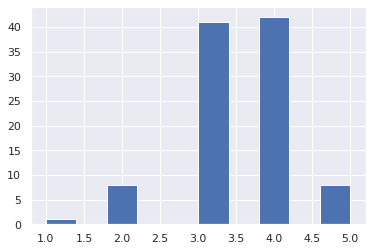

In [ ]:
strat_test_set["Amount_spent"].hist()

In [ ]:
def Amount_Spent_proportions(data):
    return data["Amount_spent"].value_counts() / len(data)

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": Amount_Spent_proportions(df1),
    "Stratified": Amount_Spent_proportions(strat_test_set),
    "Random": Amount_Spent_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.010,0.01,0.02,100.000000,0.000000
2,0.084,0.08,0.06,-28.571429,-4.761905
3,0.408,0.41,0.49,20.098039,0.490196
4,0.414,0.42,0.39,-5.797101,1.449275
5,0.084,0.08,0.04,-52.380952,-4.761905


In [ ]:
data = strat_train_set.copy()
data = data.drop(["Amount_spent"], axis = 1)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
420,33.215472,12.135101,37.142094,5.840506,663.803693
344,33.066441,11.673229,37.840655,2.727209,442.722892
59,33.754995,12.064157,37.271222,3.970556,547.365141
394,32.430839,13.887275,38.381956,3.772969,557.608262
411,32.992573,13.004362,36.985041,4.620416,589.026490


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,33.059177,12.061624,37.095637,3.522436,499.138542
std,0.991643,1.004190,1.004738,0.965739,78.244397
min,30.393185,8.668350,34.476878,0.789520,256.670582
25%,32.383808,11.388637,36.374170,2.934588,446.251465
50%,33.078224,11.972521,37.116471,3.531960,498.887875
75%,33.725473,12.815823,37.727921,4.116066,549.871479
max,36.139662,15.126994,40.005182,6.115199,765.518462


In [ ]:
df1.describe()
# we can see here the statistics are same and hence the we verify that the trainng and testing datasets from statified sampling are sample representatives.

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(data.values)

scaled_features_data = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
scaled_features_data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
420,0.157809,0.073263,0.046295,2.403314,2.107133
344,0.007334,-0.387258,0.742433,-0.824470,-0.721921
59,0.702560,0.002526,0.174975,0.464599,0.617130
394,-0.634428,1.820311,1.281857,0.259747,0.748206
411,-0.067250,0.939980,-0.110212,1.138358,1.150249


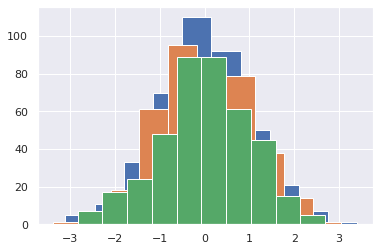

In [ ]:
# showing that after scaled all th attributes are in their normal form
scaled_features_data["Yearly Amount Spent"].hist()
scaled_features_data["Time on App"].hist()
scaled_features_data["Length of Membership"].hist()

# Preparing the training dataset for k fold method

#  Feature scaling

In [ ]:
df2 = scaled_features_data.copy()
df2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
420,0.157809,0.073263,0.046295,2.403314,2.107133
344,0.007334,-0.387258,0.742433,-0.824470,-0.721921
59,0.702560,0.002526,0.174975,0.464599,0.617130
394,-0.634428,1.820311,1.281857,0.259747,0.748206
411,-0.067250,0.939980,-0.110212,1.138358,1.150249


In [ ]:
# slicing into X labels and y labels
y_labels = df2.iloc[:,4 ]
y_labelsnp = y_labels.values
y_labelsnp.shape

(400,)

In [ ]:
x_train = df2.drop(['Yearly Amount Spent'], axis=1)
x_trainnp = x_train.values
x_trainnp.shape

(400, 4)

In [ ]:
#Regression models
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
#function for regression models

def fit_and_evaluate_model(model, x_trainnp, y_labelsnp, degree = 2):
    kfd = KFold(n_splits=4)
    kfd.get_n_splits(x_trainnp)
    train_losses = []
    val_losses = []
    train_losses_mae = []
    val_losses_mae = []
    train_losses_root = []
    val_losses_root = []
    train_losses_r2 = []
    val_losses_r2 = []

    if degree == 2:
        poly = PolynomialFeatures(degree=degree)
        X = poly.fit_transform(x_trainnp)
        x_trainnp = X

    for train_index, val_index in kfd.split(x_trainnp):
        X_train, X_val = x_trainnp[train_index], x_trainnp[val_index]
        y_train, y_val = y_labelsnp[train_index], y_labelsnp[val_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

#calculating mean squared error (MSE)
        train_loss = mean_squared_error(y_train, y_train_pred)
        val_loss = mean_squared_error(y_val, y_val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

#calculating mean absolute error (MAE)

        train_loss_mae = mean_absolute_error(y_train, y_train_pred)
        val_loss_mae = mean_absolute_error(y_val, y_val_pred)

        train_losses_mae.append(train_loss_mae)
        val_losses_mae.append(val_loss_mae)

#calculating root mean absolute error (RMSE)

        train_loss_root = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_loss_root = np.sqrt(mean_squared_error(y_val, y_val_pred))

        train_losses_root.append(train_loss_root)
        val_losses_root.append(val_loss_root)


#calculating R squared score

        train_loss_r2 = r2_score(y_train, y_train_pred)
        val_loss_r2 = r2_score(y_val, y_val_pred)

        train_losses_r2.append(train_loss_r2)
        val_losses_r2.append(val_loss_r2)

    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)

    avg_train_loss_mae = np.mean(train_losses_mae)
    avg_val_loss_mae = np.mean(val_losses_mae)

    avg_train_loss_root = np.mean(train_losses_root)
    avg_val_loss_root = np.mean(val_losses_root)

    avg_train_loss_r2 = np.mean(train_losses_r2)
    avg_val_loss_r2 = np.mean(val_losses_r2)

    print ("avg_train_loss: ", avg_train_loss)
    print ("avg_val_loss: ", avg_val_loss)

    print ("avg_train_loss_mae: ", avg_train_loss_mae)
    print ("avg_val_loss_mae: ", avg_val_loss_mae)

    print ("avg_train_loss_root: ", avg_train_loss_root)
    print ("avg_val_loss_root: ", avg_val_loss_root)

    print ("avg_train_loss_r_squared: ", avg_train_loss_r2)
    print ("avg_val_loss_r_squared: ", avg_val_loss_r2)

    print("Plotting the loss curve for MSE: ")

    plt.plot(train_losses, label='Training Loss',marker='o')
    plt.plot(val_losses, label='Validation Loss',marker='x')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2



In [ ]:
#function to iterate over alpha
def alpha_iterate(x_trainnp, y_labelsnp, degree =1, alphaa =1):
    alphas = np.linspace(0.05, alphaa,5)
    kf = KFold(n_splits=4)
    kf.get_n_splits(x_trainnp)
    train_losses = []
    val_losses = []

    for alpha in alphas:
        alpha_train_losses = []
        alpha_val_losses = []


        if degree == 2:
            poly = PolynomialFeatures(degree=degree)
            X = poly.fit_transform(x_trainnp)
            x_trainnp = X



        for train_index, val_index in kf.split(x_trainnp):
            X_train, X_val = x_trainnp[train_index], x_trainnp[val_index]
            y_train, y_val = y_labelsnp[train_index], y_labelsnp[val_index]

            model = Ridge(alpha = alpha).fit(X_train, y_train)
            #model = Lasso(alpha = alpha).fit(X_train, y_train)
            #model = ElasticNet(alpha = alpha, l1_ratio = 0.5).fit(X_train, y_train)
            #model = SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", eta0=0.1, random_state=42, alpha = alpha).fit(X_train, y_train)
            #model = SGDRegressor(max_iter=1000, tol=1e-3, penalty="l1", eta0=0.1, random_state=42, alpha = alpha).fit(X_train, y_train)
            #model = SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", eta0=0.1, random_state=42, alpha = alpha,l1_ratio = 0.5).fit(X_train, y_train)


            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)

            train_loss = mean_squared_error(y_train, y_train_pred)
            val_loss = mean_squared_error(y_val, y_val_pred)

            alpha_train_losses.append(train_loss)
            alpha_val_losses.append(val_loss)

        avg_train_loss = np.mean(alpha_train_losses)
        avg_val_loss = np.mean(alpha_val_losses)

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

    plt.plot(alphas, train_losses, label='train')
    plt.plot(alphas, val_losses, label='validation')
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

In [ ]:
results_df = pd.DataFrame(columns=['Regression', 'Avg Training Loss', 'Avg Validation Loss', 'Avg Training Loss MAE', 'Avg Val Loss MAE','Avg Training Loss RMSE', 'Avg Val Loss RMSE', 'Avg Training Loss R squared', 'Avg Val Loss R squared' ])

# answer 5
I have run the asked models with variations of loss functions with the :

1) Kfold   
2) Alpha(penalty term) to determine the optimum value of alpha
3) batch size and epoch

In the end a comparision between performances of all the models has been done and prediction has been made on the identified best model.

In some places like the polynomial SGD regularizaion, alpha iterations could not be plotted as google collab crashed.

Rference for code is the couse text book here

# Linear Regression

avg_train_loss:  0.01534283603267984
avg_val_loss:  0.017219099737955337
avg_train_loss_mae:  0.09726052502745361
avg_val_loss_mae:  0.10390810099681227
avg_train_loss_root:  0.12384644448324802
avg_val_loss_root:  0.13108324566741344
avg_train_loss_r_squared:  0.9846211082518632
avg_val_loss_r_squared:  0.9824161095809011
Plotting the loss curve for MSE: 


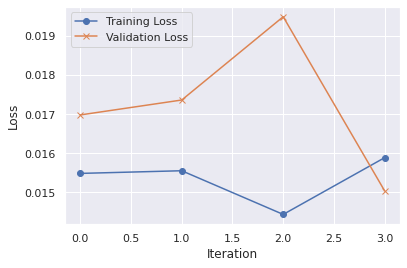

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(LinearRegression(), x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'LR', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

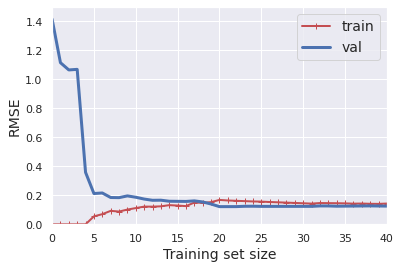

In [ ]:
#plotting learning curves
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_trainnp, y_labelsnp)
plt.axis([0, 40, 0, 1.5])
plt.show()

in the above plot we can see it the validation loss is decresing and traning loss is not 0 so the model is not overfitting.

# Linear Regression Model with Ridge Regularization

avg_train_loss:  0.015342940156969277
avg_val_loss:  0.017218479173266868
avg_train_loss_mae:  0.09726586939830009
avg_val_loss_mae:  0.10391182980045802
avg_train_loss_root:  0.12384686510956266
avg_val_loss_root:  0.13108168835561237
avg_train_loss_r_squared:  0.9846210036828027
avg_val_loss_r_squared:  0.9824163305642826
Plotting the loss curve for MSE: 


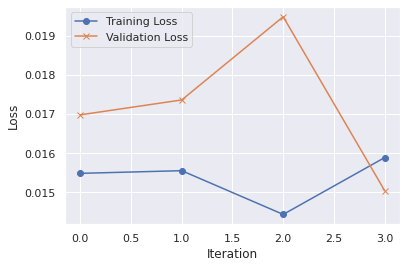

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(Ridge(alpha=0.1), x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'LR Ridge', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

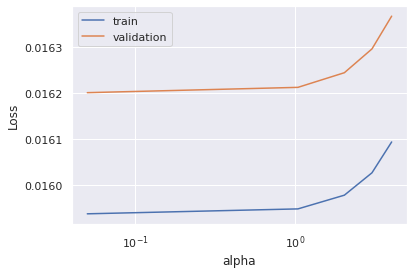

In [ ]:
#iterating alpha over several vlaues
alpha_iterate(x_trainnp, y_labelsnp, alphaa = 4)

the above graph is helpful because the optimum value of alpha before the validation loss rises can be measured.

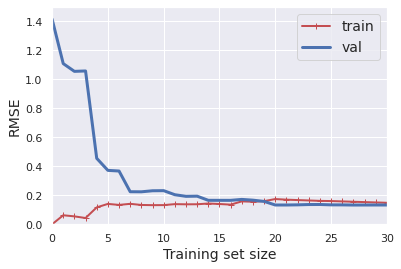

In [ ]:
reg = Ridge(alpha = 1)
plot_learning_curves(reg, x_trainnp, y_labelsnp)
plt.axis([0, 30, 0, 1.5])
plt.show()

I think as there is not much gap here the model has learned pretty well.

# Linear Regression Model with Lasso Regularization

avg_train_loss:  0.04472942065563272
avg_val_loss:  0.04636772822584284
avg_train_loss_mae:  0.1683501239900754
avg_val_loss_mae:  0.17092858874271266
avg_train_loss_root:  0.2114765042552898
avg_val_loss_root:  0.21429013794914165
avg_train_loss_r_squared:  0.9550947951074393
avg_val_loss_r_squared:  0.9533299517173272
Plotting the loss curve for MSE: 


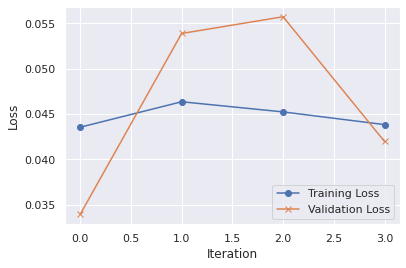

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(Lasso(alpha=0.1), x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'LR Lasso', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

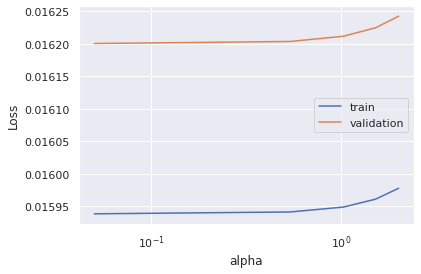

In [ ]:
#iterating alpha over several vlaues
alpha_iterate(x_trainnp, y_labelsnp, alphaa = 2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


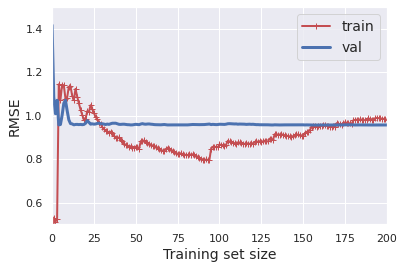

In [ ]:
reg = Lasso(alpha = 10, tol=0.000001)
plot_learning_curves(reg, x_trainnp, y_labelsnp)
plt.axis([0, 200, 0.5, 1.5])
plt.show()

It is an interesting behavious of the model here sa the validation curve kind of reamins constant the training loss increases and goes down and up again. The model is not performing well nd can be said to be a underfitted model.

# Linear Regression Model with Elasticnet Regularization

avg_train_loss:  0.031391874488175195
avg_val_loss:  0.03237841989278859
avg_train_loss_mae:  0.14138393380668707
avg_val_loss_mae:  0.1431882270338334
avg_train_loss_root:  0.17716979565007251
avg_val_loss_root:  0.17947197949370378
avg_train_loss_r_squared:  0.9684987517524245
avg_val_loss_r_squared:  0.9672020293346544
Plotting the loss curve for MSE: 


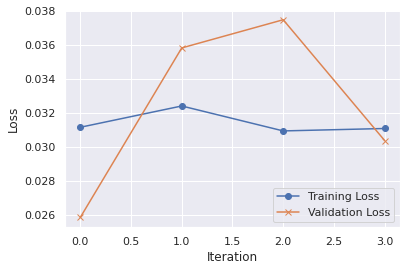

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(ElasticNet(alpha=0.1, l1_ratio=0.5), x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'LR Elastic Net', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

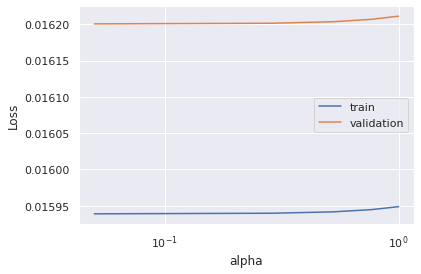

In [ ]:
#iterating alpha over several vlaues
alpha_iterate(x_trainnp, y_labelsnp, alphaa = 1)

variatoions with alpha above to determine best alpha value

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


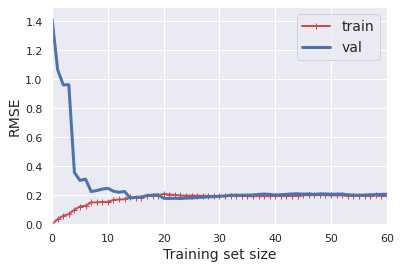

In [ ]:
reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
plot_learning_curves(reg, x_trainnp, y_labelsnp)
plt.axis([0, 60, 0, 1.5])
plt.show()

The above graph suggest a good fit of the model as there is not much gap between the curves and it converges

# Stochastic Gradient Descent

avg_train_loss:  0.019257356619759067
avg_val_loss:  0.02022381178777876
avg_train_loss_mae:  0.10985286797446119
avg_val_loss_mae:  0.11285081634135356
avg_train_loss_root:  0.13843087451413627
avg_val_loss_root:  0.14179549878522885
avg_train_loss_r_squared:  0.9806778196963044
avg_val_loss_r_squared:  0.9793437321643939
Plotting the loss curve for MSE: 


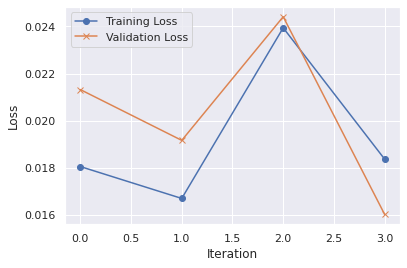

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42), x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'SGD', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_trainnp, y_labelsnp, test_size=0.2, random_state=10)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None , learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)



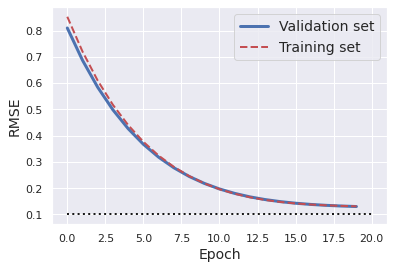

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None , learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 20
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])



best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

The loss upobe looks good but since the curves ovelapps I do not think the model is learning well.

# SGD Regression with Ridge Regularization

avg_train_loss:  0.027798057755235372
avg_val_loss:  0.03126249475375639
avg_train_loss_mae:  0.13136625016393502
avg_val_loss_mae:  0.13753740181268284
avg_train_loss_root:  0.16666388218230377
avg_val_loss_root:  0.17610888027109278
avg_train_loss_r_squared:  0.9721750431126166
avg_val_loss_r_squared:  0.9682729103136112
Plotting the loss curve for MSE: 


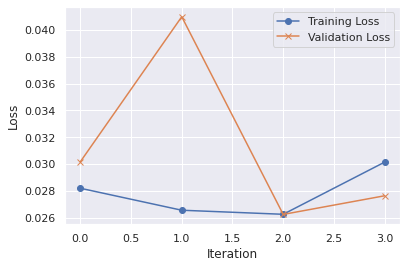

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", eta0=0.1, random_state=42, alpha = 0.1), x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'SGD Ridge', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

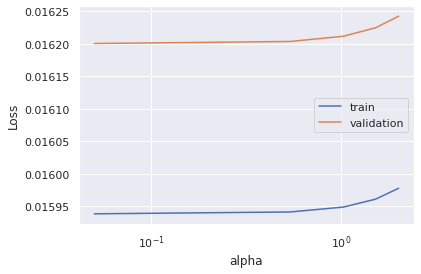

In [ ]:
#iterating alpha over several vlaues
alpha_iterate(x_trainnp, y_labelsnp, alphaa = 2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_trainnp, y_labelsnp, test_size=0.2, random_state=10)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty='l2',alpha = 0.1 , learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

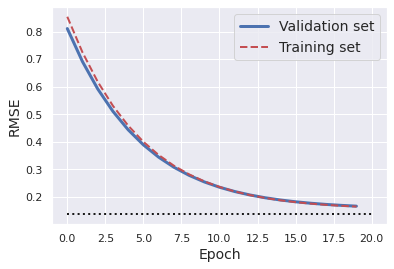

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty='l2',alpha = 0.1 , learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 20
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])



best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

# SGD Regression with Lasso Regularization

avg_train_loss:  0.042395955448116404
avg_val_loss:  0.04394786709410381
avg_train_loss_mae:  0.1644968197605659
avg_val_loss_mae:  0.1658310162216889
avg_train_loss_root:  0.20564521388144424
avg_val_loss_root:  0.20803516809057288
avg_train_loss_r_squared:  0.9573296193983881
avg_val_loss_r_squared:  0.9561290591751841
Plotting the loss curve for MSE: 


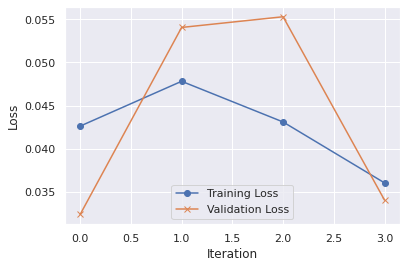

In [ ]:
sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-3, penalty="l1", eta0=0.1, random_state=42, alpha = 0.1)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(sgd_lasso, x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'SGD Lasso', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

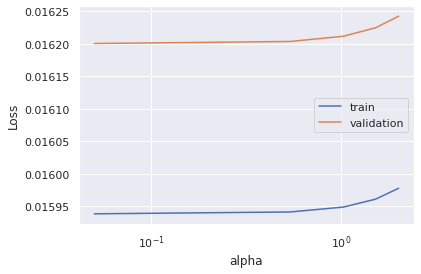

In [ ]:
#iterating alpha over several vlaues
alpha_iterate(x_trainnp, y_labelsnp, alphaa = 2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_trainnp, y_labelsnp, test_size=0.2, random_state=10)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty='l1',alpha = 0.1 , learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

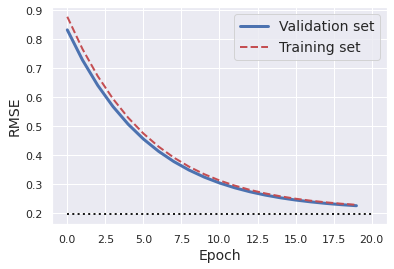

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty='l1',alpha = 0.1 , learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 20
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])



best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

This seems to be a good fit as the validation loss is below th trainng loss and they both converge eventually

# SGD Regression with Elastic Net Regularization

avg_train_loss:  0.023103545902266723
avg_val_loss:  0.023757640021768223
avg_train_loss_mae:  0.12071688121115505
avg_val_loss_mae:  0.1214844843552389
avg_train_loss_root:  0.1518694084904964
avg_val_loss_root:  0.1540786104382953
avg_train_loss_r_squared:  0.9768520620356123
avg_val_loss_r_squared:  0.9756786063341345
Plotting the loss curve for MSE: 


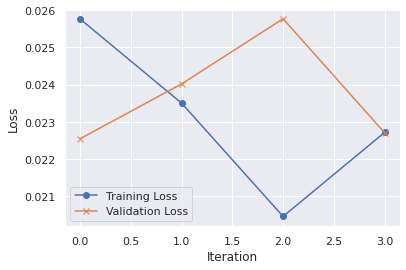

In [ ]:
sgd_elastic_net = SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", eta0=0.1, random_state=42, alpha = 0.1)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(sgd_elastic_net, x_trainnp, y_labelsnp)
results_df = results_df.append({'Regression': 'SGD Lasso', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

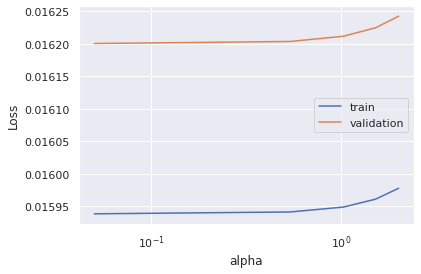

In [ ]:
#iterating alpha over several vlaues
alpha_iterate(x_trainnp, y_labelsnp, alphaa = 2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_trainnp, y_labelsnp, test_size=0.2, random_state=10)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty='elasticnet',l1_ratio = 0.5,alpha = 0.1 , learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

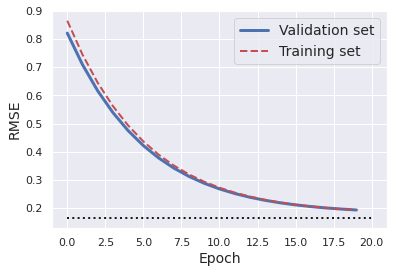

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty='elasticnet', l1_ratio = 0.5 ,alpha = 0.1 , learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 20
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])



best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

# Polynomial Regression with Linear Regression

avg_train_loss:  0.01534283603267984
avg_val_loss:  0.017219099737955337
avg_train_loss_mae:  0.09726052502745361
avg_val_loss_mae:  0.10390810099681227
avg_train_loss_root:  0.12384644448324802
avg_val_loss_root:  0.13108324566741344
avg_train_loss_r_squared:  0.9846211082518632
avg_val_loss_r_squared:  0.9824161095809011
Plotting the loss curve for MSE: 


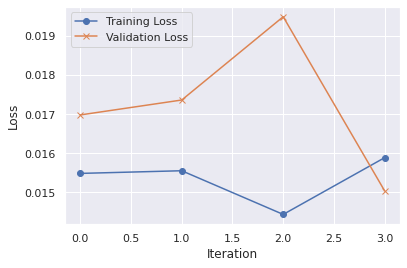

In [ ]:
poly_linear = LinearRegression()
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(poly_linear, x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'Polynomial Regression (LR)', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

# Polynomial Regression with Linear Regression and Ridge Regularization

avg_train_loss:  0.015342940156969277
avg_val_loss:  0.017218479173266868
avg_train_loss_mae:  0.09726586939830009
avg_val_loss_mae:  0.10391182980045802
avg_train_loss_root:  0.12384686510956266
avg_val_loss_root:  0.13108168835561237
avg_train_loss_r_squared:  0.9846210036828027
avg_val_loss_r_squared:  0.9824163305642826
Plotting the loss curve for MSE: 


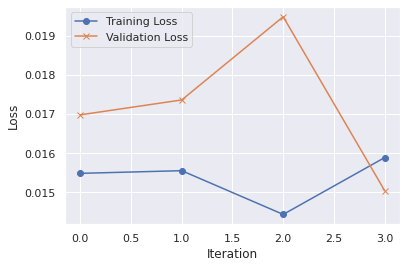

In [ ]:
ridge = Ridge(alpha=0.1)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(ridge, x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'Poly Ridge Regression', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

In [ ]:
#alpha_iterate(x_trainnp, y_labelsnp,degree = 2, alphaa = 1)

# Polynomial Regression with Linear Regression and Lasso Regularization

avg_train_loss:  0.04472942065563272
avg_val_loss:  0.04636772822584284
avg_train_loss_mae:  0.1683501239900754
avg_val_loss_mae:  0.17092858874271266
avg_train_loss_root:  0.2114765042552898
avg_val_loss_root:  0.21429013794914165
avg_train_loss_r_squared:  0.9550947951074393
avg_val_loss_r_squared:  0.9533299517173272
Plotting the loss curve for MSE: 


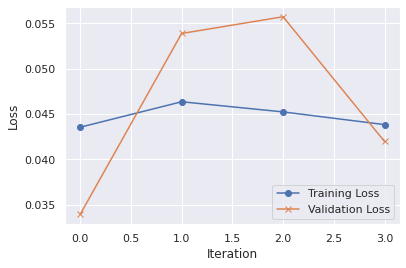

In [ ]:
lasso = Lasso(alpha=0.1)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(lasso, x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'Poly Lasso Regression', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

# Polynomial Regression with Linear Regression and Elastic Net

avg_train_loss:  0.031391874488175195
avg_val_loss:  0.03237841989278859
avg_train_loss_mae:  0.14138393380668707
avg_val_loss_mae:  0.1431882270338334
avg_train_loss_root:  0.17716979565007251
avg_val_loss_root:  0.17947197949370378
avg_train_loss_r_squared:  0.9684987517524245
avg_val_loss_r_squared:  0.9672020293346544
Plotting the loss curve for MSE: 


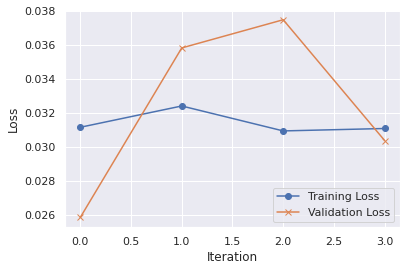

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(ElasticNet(alpha=0.1, l1_ratio=0.5), x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'Poly Elastic Net', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

# Answer 6

similar efforts has been done with polynomila regresion. here manually alpha values has been changd as google colab was crashing so no iteralpha function was not working.

# Polynomial Regession with SGD

avg_train_loss:  0.019257356619759067
avg_val_loss:  0.02022381178777876
avg_train_loss_mae:  0.10985286797446119
avg_val_loss_mae:  0.11285081634135356
avg_train_loss_root:  0.13843087451413627
avg_val_loss_root:  0.14179549878522885
avg_train_loss_r_squared:  0.9806778196963044
avg_val_loss_r_squared:  0.9793437321643939
Plotting the loss curve for MSE: 


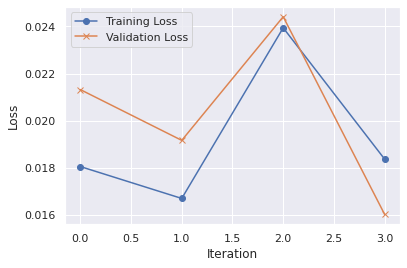

In [ ]:
SGD = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGD, x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'SGD', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

# Polynomial Regression with SGD and Ridge Regularization

avg_train_loss:  0.027798057755235372
avg_val_loss:  0.03126249475375639
avg_train_loss_mae:  0.13136625016393502
avg_val_loss_mae:  0.13753740181268284
avg_train_loss_root:  0.16666388218230377
avg_val_loss_root:  0.17610888027109278
avg_train_loss_r_squared:  0.9721750431126166
avg_val_loss_r_squared:  0.9682729103136112
Plotting the loss curve for MSE: 


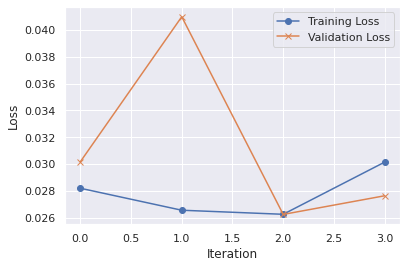

In [ ]:
SGD = SGDRegressor(alpha=0.5)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", eta0=0.1, random_state=42, alpha = 0.1), x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'SGD Ridge Regression', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

avg_train_loss:  0.38698083243256187
avg_val_loss:  0.40826459994567355
avg_train_loss_mae:  0.45426098130525766
avg_val_loss_mae:  0.471151426192074
avg_train_loss_root:  0.6208809020699362
avg_val_loss_root:  0.6304330749612246
avg_train_loss_r_squared:  0.6113251408635809
avg_val_loss_r_squared:  0.5859509019875881
Plotting the loss curve for MSE: 


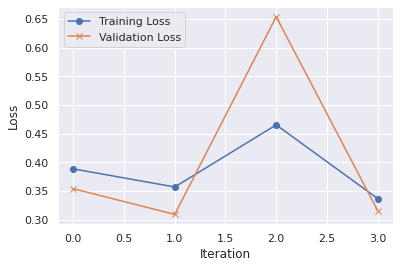

In [ ]:
SGD = SGDRegressor(alpha=0.5)
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", eta0=0.2, random_state=42, alpha = 1), x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'SGD Ridge Regression', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

differnet alpha values and eta values were used and it can be seen that the k fold lerning curve has been changed.

# Polynomial Regression with SGD and Lasso Regularization

avg_train_loss:  0.042395955448116404
avg_val_loss:  0.04394786709410381
avg_train_loss_mae:  0.1644968197605659
avg_val_loss_mae:  0.1658310162216889
avg_train_loss_root:  0.20564521388144424
avg_val_loss_root:  0.20803516809057288
avg_train_loss_r_squared:  0.9573296193983881
avg_val_loss_r_squared:  0.9561290591751841
Plotting the loss curve for MSE: 


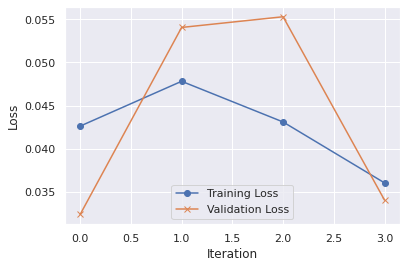

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGDRegressor(max_iter=1000, tol=1e-3, penalty="l1", eta0=0.1, random_state=42, alpha = 0.1), x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'Poly SGD Lasso Regression', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

# Polynomial Regression with SGD and Elastic Net

avg_train_loss:  0.023103545902266723
avg_val_loss:  0.023757640021768223
avg_train_loss_mae:  0.12071688121115505
avg_val_loss_mae:  0.1214844843552389
avg_train_loss_root:  0.1518694084904964
avg_val_loss_root:  0.1540786104382953
avg_train_loss_r_squared:  0.9768520620356123
avg_val_loss_r_squared:  0.9756786063341345
Plotting the loss curve for MSE: 


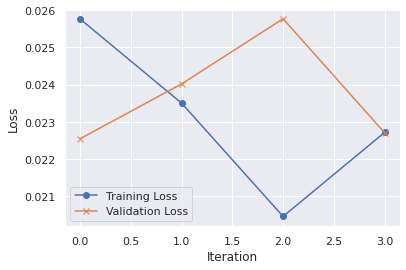

In [ ]:
avg_train_loss, avg_val_loss, avg_train_loss_mae, avg_val_loss_mae, avg_train_loss_root, avg_val_loss_root, avg_train_loss_r2, avg_val_loss_r2 = fit_and_evaluate_model(SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", eta0=0.1, random_state=42, alpha = 0.1), x_trainnp, y_labelsnp, degree=2)
results_df = results_df.append({'Regression': 'Poly SGD Elastic Net', 'Avg Training Loss': avg_train_loss, 'Avg Validation Loss': avg_val_loss, 'Avg Training Loss MAE': avg_train_loss_mae, 'Avg Val Loss MAE': avg_val_loss_mae, 'Avg Training Loss RMSE': avg_train_loss_root, 'Avg Val Loss RMSE': avg_val_loss_root, 'Avg Training Loss R squared': avg_train_loss_r2, 'Avg Val Loss R squared': avg_val_loss_r2}, ignore_index=True)

# Answer 7
sumary of modles and predicions

In [ ]:
results_df

,Regression,Avg Training Loss,Avg Validation Loss,Avg Training Loss MAE,Avg Val Loss MAE,Avg Training Loss RMSE,Avg Val Loss RMSE,Avg Training Loss R squared,Avg Val Loss R squared
0,LR,0.015343,0.017219,0.097261,0.103908,0.123846,0.131083,0.984621,0.982416
1,LR Ridge,0.015343,0.017218,0.097266,0.103912,0.123847,0.131082,0.984621,0.982416
2,LR Lasso,0.044729,0.046368,0.168350,0.170929,0.211477,0.214290,0.955095,0.953330
3,LR Elastic Net,0.031392,0.032378,0.141384,0.143188,0.177170,0.179472,0.968499,0.967202
4,SGD,0.019257,0.020224,0.109853,0.112851,0.138431,0.141795,0.980678,0.979344
5,SGD Ridge,0.027798,0.031262,0.131366,0.137537,0.166664,0.176109,0.972175,0.968273
6,SGD Lasso,0.042396,0.043948,0.164497,0.165831,0.205645,0.208035,0.957330,0.956129
7,SGD Lasso,0.023104,0.023758,0.120717,0.121484,0.151869,0.154079,0.976852,0.975679
8,Polynomial Regression (LR),0.015343,0.017219,0.097261,0.103908,0.123846,0.131083,0.984621,0.982416
9,Poly Ridge Regression,0.015343,0.017218,0.097266,0.103912,0.123847,0.131082,0.984621,0.982416


In [ ]:
#Predictions:
min_loss_rmse = results_df['Avg Val Loss RMSE'].min()
print ('Minimum los for RMSE', min_loss_rmse)
# we came to know the least error is for linear regression with Ridge

Minimum los for RMSE 0.13108168835561237


In [ ]:
#testing:
test_dataset = strat_test_set.copy()
test_dataset = test_dataset.drop(["Amount_spent"], axis = 1)

In [ ]:
test_dataset.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
106,32.291756,12.190474,36.152462,3.781823,494.551861
486,33.452295,12.005916,36.534096,4.712234,576.477607
78,32.597183,10.889567,38.212571,4.442054,488.786061
462,33.503810,11.233415,37.211153,2.320550,397.420584
87,34.447871,10.607724,36.819096,3.366464,473.728967


In [ ]:
y_labels = test_dataset.iloc[:, 4]
y_labelsnp_test = y_labels.values
y_labelsnp_test.shape

(100,)

In [ ]:
x_test = test_dataset.drop(['Yearly Amount Spent'], axis=1)
x_testnp = x_test.values
x_testnp.shape

(100, 4)

In [ ]:
y_train = strat_train_set.iloc[:,4]

In [ ]:

X_trainn = strat_train_set.drop(["Amount_spent"],  axis = 1)
X_trainn = X_trainn.drop(["Yearly Amount Spent"], axis = 1)

In [ ]:
strat_train_set.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Amount_spent
420,33.215472,12.135101,37.142094,5.840506,663.803693,5
344,33.066441,11.673229,37.840655,2.727209,442.722892,3
59,33.754995,12.064157,37.271222,3.970556,547.365141,4
394,32.430839,13.887275,38.381956,3.772969,557.608262,4
411,32.992573,13.004362,36.985041,4.620416,589.026490,4


In [ ]:
#predictinons:
model = Ridge(alpha=0.1)
model.fit(X_trainn,y_train)
y_pred = model.predict(x_testnp)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
print(model.score(x_testnp, y_labelsnp_test))

0.9851054293403837


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
y_pred[0]

500.4943231252105

In [ ]:
y_labelsnp_test[0]

494.55186108657256